#### Import Library & Load Data

In [9]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier
from vecstack import StackingTransformer, stacking

In [10]:
data = pd.read_csv('./data/Elderly.csv')
data.shape

(1531, 11)

In [11]:
data.head()

,Gender,Age,Religion,Job,Married,Edu,Health,Self_conf,Earn,Activity,target
0,0,73,3,1.0,0,0,1,0,0,0,1
1,0,79,2,2.0,1,1,2,2,0,3,5
2,1,77,3,1.0,1,0,2,2,2,0,3
3,0,72,1,2.0,0,0,2,1,0,0,1
4,0,72,2,1.0,0,1,1,1,0,0,1


#### EDA

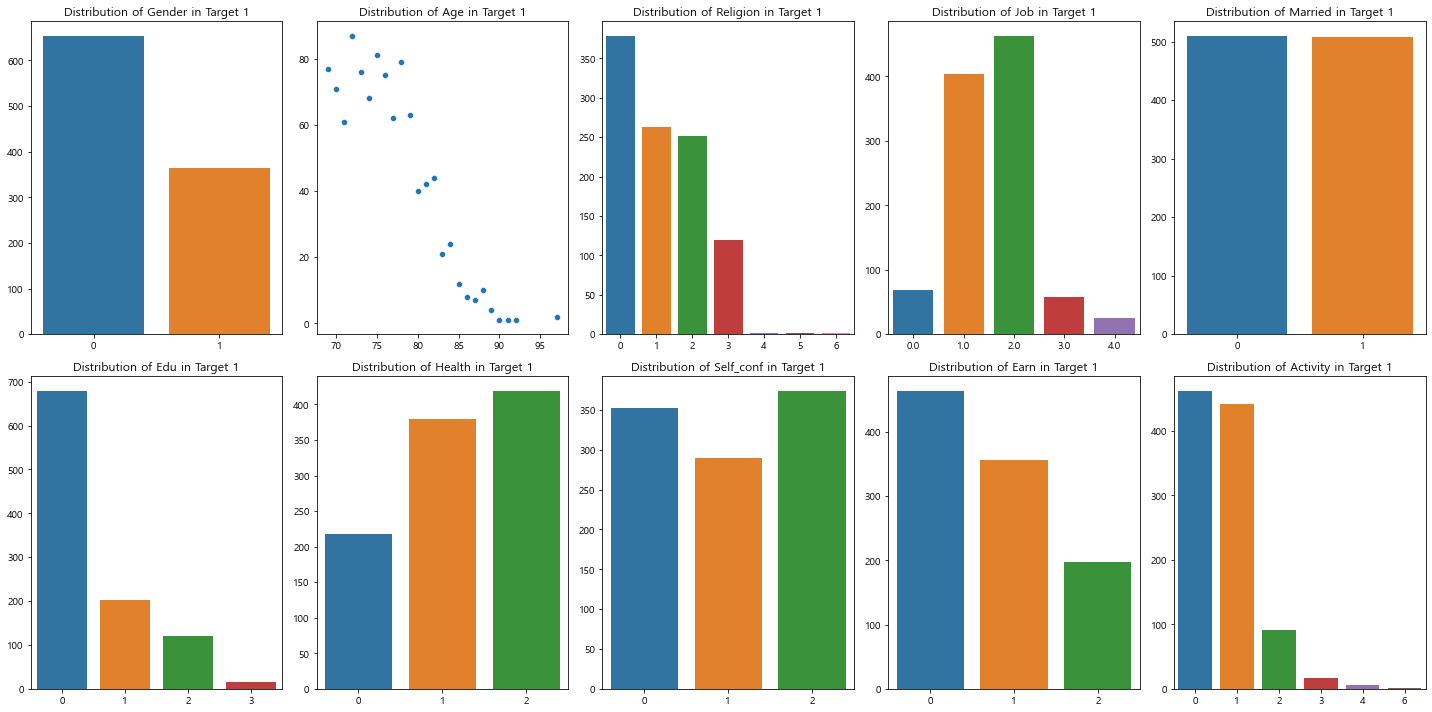

In [12]:
cols = data.drop(['target'], axis=1).columns
temp = data[data['target']==1]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 1')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 1')

plt.tight_layout()
plt.show()

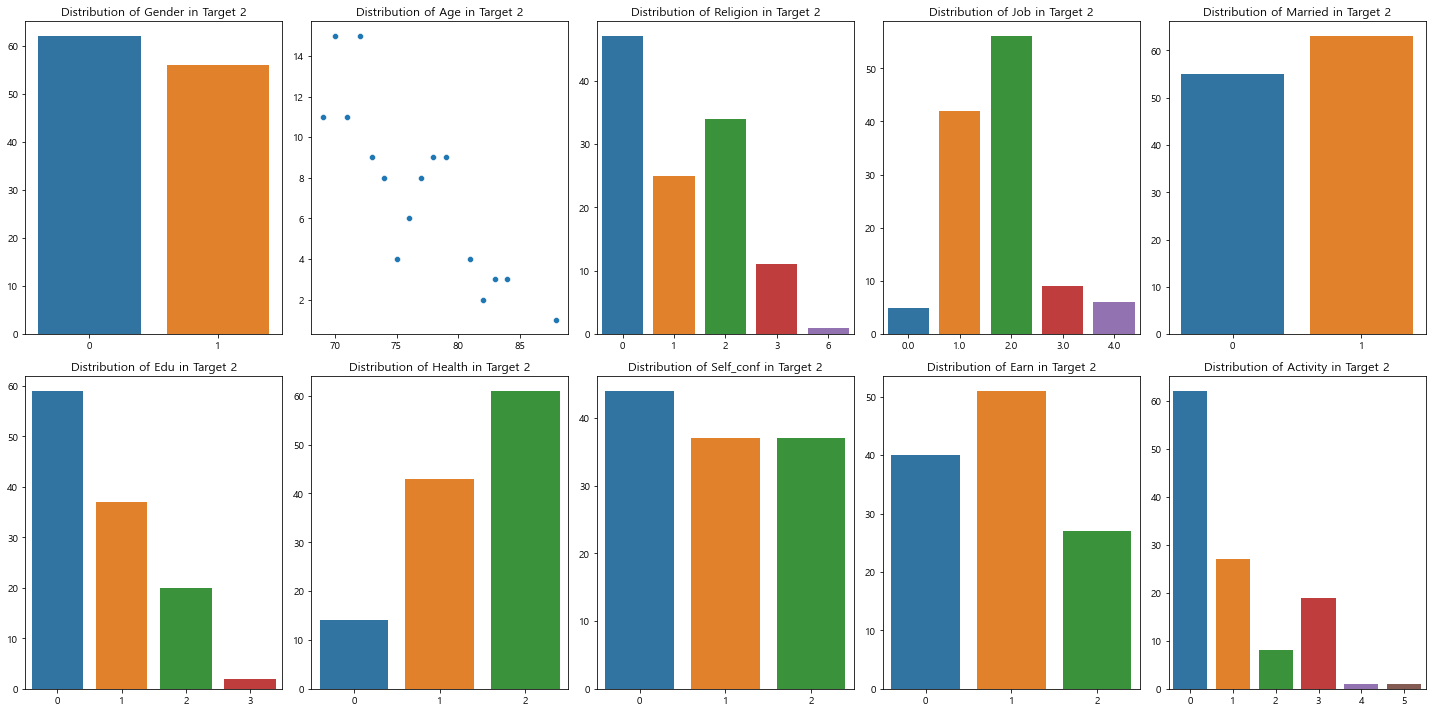

In [13]:
temp = data[data['target']==2]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 2')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 2')

plt.tight_layout()
plt.show()

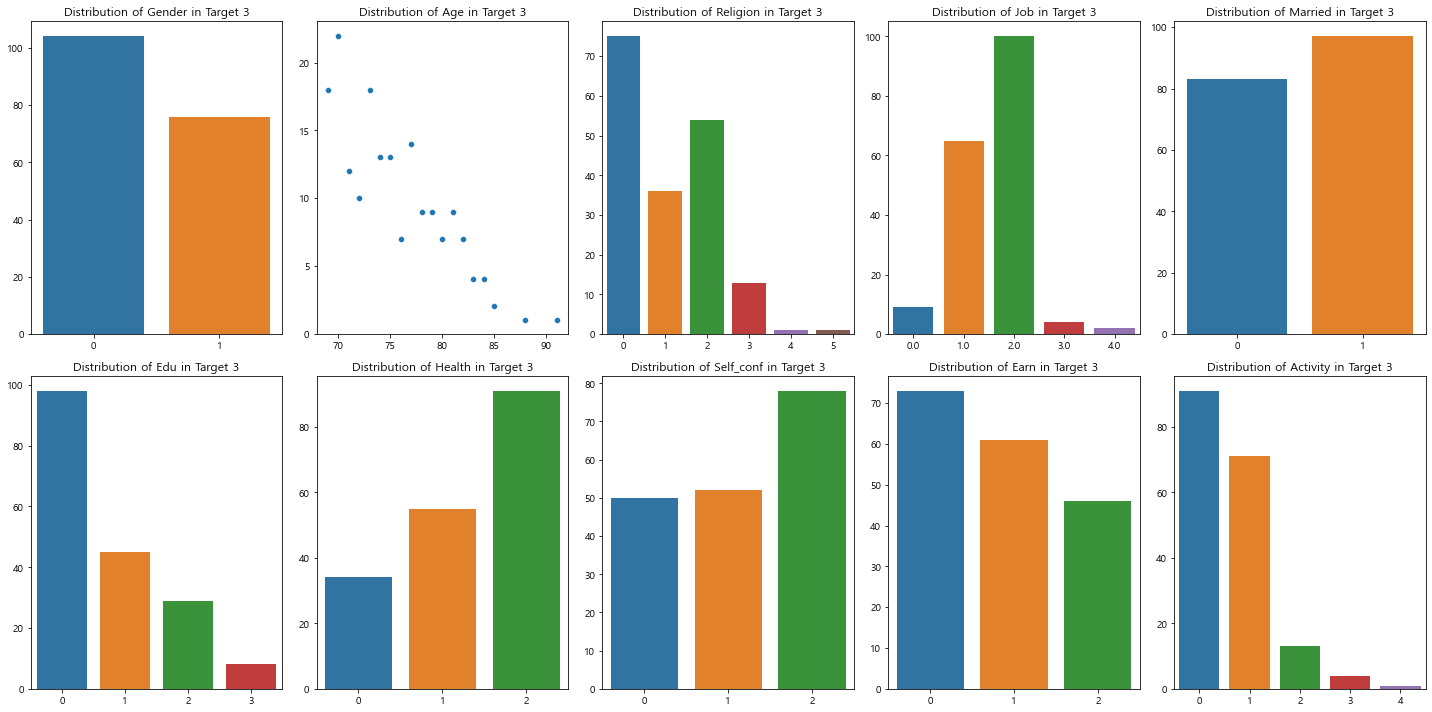

In [14]:
temp = data[data['target']==3]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 3')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 3')

plt.tight_layout()
plt.show()

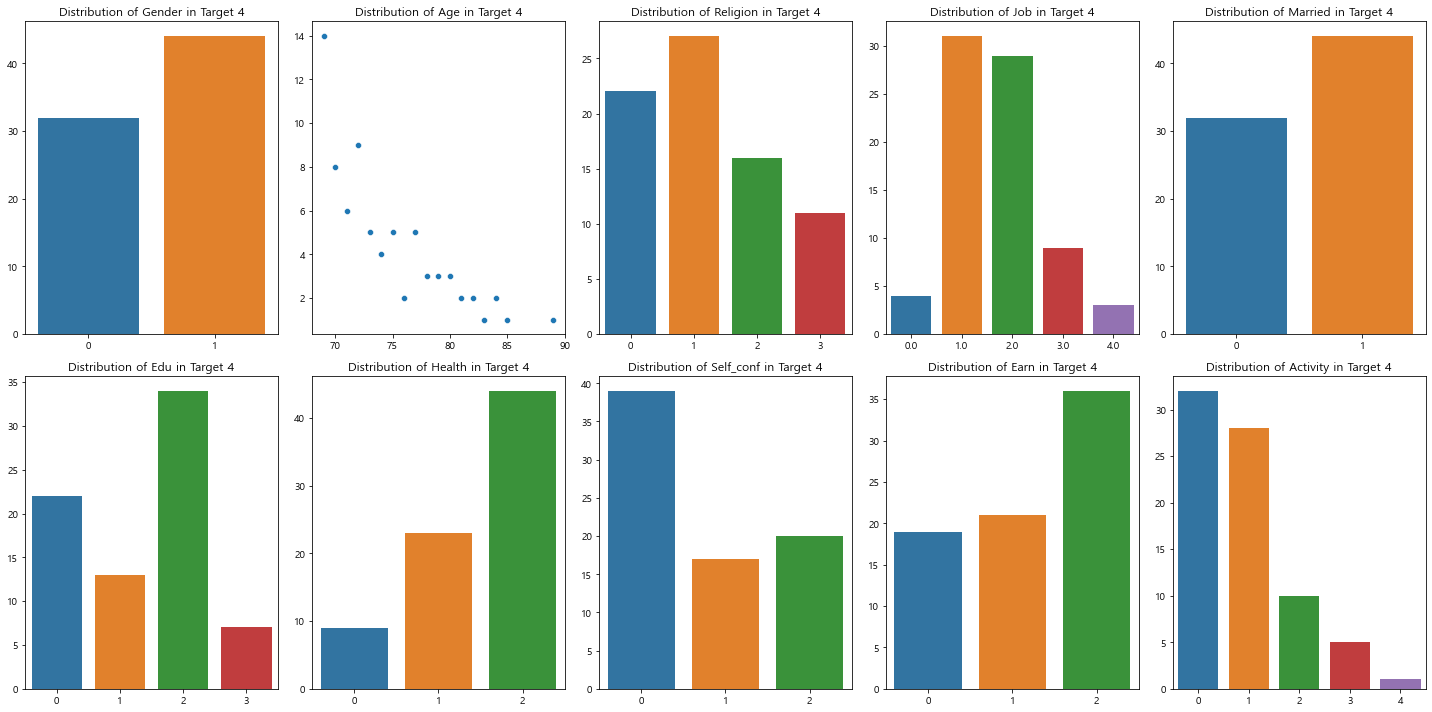

In [15]:
temp = data[data['target']==4]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 4')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 4')

plt.tight_layout()
plt.show()

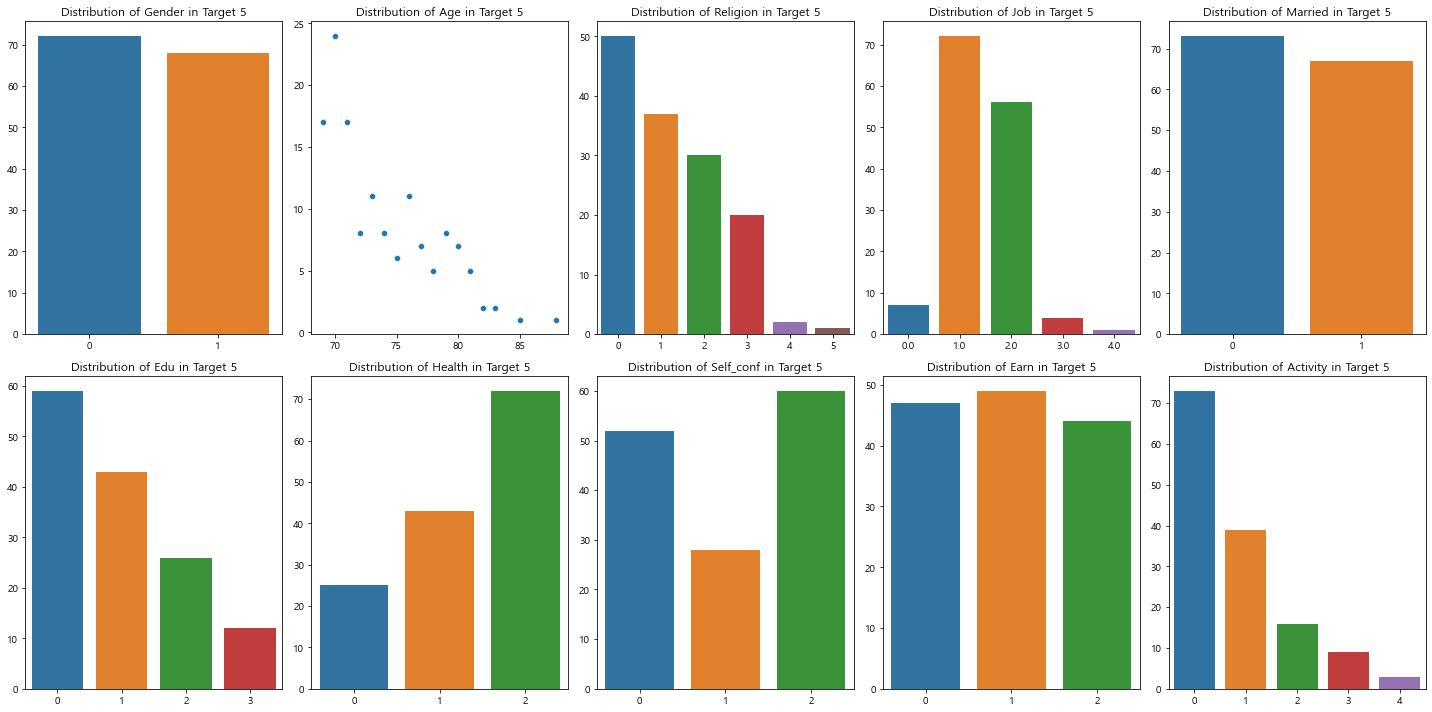

In [16]:
temp = data[data['target']==5]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 5')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 5')

plt.tight_layout()
plt.show()

#### Oversampling

In [9]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

In [10]:
y_train.value_counts()

1    813
3    144
5    112
2     94
4     61
Name: target, dtype: int64

In [11]:
oversampling_instance = SMOTE(random_state=2022)
X_train, y_train = oversampling_instance.fit_resample(X_train, y_train)
y_train.value_counts()

2    813
4    813
1    813
3    813
5    813
Name: target, dtype: int64

In [12]:
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train, y_train)
pred = lr.predict_proba(X_test)
roc_auc_score(y_test, pred, multi_class='ovo')

0.5769240196078431

In [13]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly, y, stratify=y, test_size=0.2, random_state=2022)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict_proba(X_test_2)
print('Polynomial LogisticRegression: ',roc_auc_score(y_test_2, pred, multi_class='ovo'))

X_train_2, y_train_2 = oversampling_instance.fit_resample(X_train_2, y_train_2)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict_proba(X_test_2)
print('Polynomial + SMOTE LogisticRegression: ',roc_auc_score(y_test_2, pred, multi_class='ovo'))

Polynomial LogisticRegression:  0.5
Polynomial + SMOTE LogisticRegression:  0.5878248521630874


#### Modeling

In [14]:
# RandomSearch Tuning
tuned_models = []

clfs = [
(RandomForestClassifier(random_state=2022, n_jobs=-1),
    {'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 70, 90, 110],
    'max_depth': [3, 5, 7,10],
    'max_features': [0.8,0.85,0.9]}
),
(LGBMClassifier(random_state=2022, objective='multiclass', n_jobs=-1),
    {'learning_rate': np.arange(0.1, 0.6, 0.1),
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75,0.85,0.95]}
),
(XGBClassifier(random_state=2022),
    {'learning_rate': [0.05,0.35,0.65,1.0],
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75, 0.85, 0.95],
        'gamma': [0,2,4]}
),
(CatBoostClassifier(random_seed=2022),
    {'learning_rate': [0.05, 0.35, 0.65, 1.0],
    'n_estimators': [100,125,150,175,200],
    'max_depth':[3,5,7,9]}
),
(LogisticRegression(random_state=2022, multi_class='multinomial'),
    {'C': [100, 10, 1, 0.1, 0.01],
    'penalty':['none', 'l1', 'l2', 'elasticnet']}
)
]

for clf, param_grid in tqdm(clfs):
    rs = RandomizedSearchCV(clf, param_distributions = param_grid, scoring='accuracy', n_iter=30, random_state=2022, n_jobs=-1)
    scores = cross_val_score(rs, X_train, y_train, scoring='accuracy', cv = 5, n_jobs=-1)
    clf_name = type(clf).__name__
    clf_score = max(scores)

    print(f'모델: {clf_name:30} 성능: {clf_score}')
    
    tuned_models.append((clf_name, rs, clf_score))

 20%|██        | 1/5 [00:30<02:01, 30.33s/it]

모델: RandomForestClassifier         성능: 0.7626076260762608


 40%|████      | 2/5 [00:56<01:23, 27.82s/it]

모델: LGBMClassifier                 성능: 0.8327183271832719


 60%|██████    | 3/5 [04:27<03:42, 111.41s/it]

모델: XGBClassifier                  성능: 0.8548585485854858


 80%|████████  | 4/5 [06:19<01:51, 111.64s/it]

모델: CatBoostClassifier             성능: 0.8327183271832719


100%|██████████| 5/5 [06:26<00:00, 77.23s/it] 

모델: LogisticRegression             성능: 0.35424354243542433


In [15]:
bayesian_tuned = []

In [16]:
# Bayesian Tuning of RandomForest

def objective(trial):
      
    rf_n_estimators = trial.suggest_int("n_estimators", 50, 150)
    rf_max_depth = trial.suggest_int("max_depth", 2, 10, log=True)
    rf_max_features = trial.suggest_float("max_features", 0.6, 0.95)
    rf_criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    

    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                            max_depth=rf_max_depth,
                                            max_features=rf_max_features,
                                            criterion=rf_criterion,
                                            n_jobs=-1, 
                                            random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 14:11:42,618] A new study created in memory with name: no-name-d8e34c57-ed73-4a21-9f61-a59ff37b4a11
[I 2022-05-18 14:11:42,883] Trial 0 finished with value: 0.34047061180405547 and parameters: {'n_estimators': 123, 'max_depth': 2, 'max_features': 0.7489935029011955, 'criterion': 'gini'}. Best is trial 0 with value: 0.34047061180405547.
[I 2022-05-18 14:11:43,855] Trial 1 finished with value: 0.5586735632050419 and parameters: {'n_estimators': 71, 'max_depth': 6, 'max_features': 0.700401145042325, 'criterion': 'entropy'}. Best is trial 1 with value: 0.5586735632050419.
[I 2022-05-18 14:11:44,938] Trial 2 finished with value: 0.5621186870446504 and parameters: {'n_estimators': 140, 'max_depth': 6, 'max_features': 0.769303061205269, 'criterion': 'entropy'}. Best is trial 2 with value: 0.5621186870446504.
[I 2022-05-18 14:11:45,157] Trial 3 finished with value: 0.34711503844099134 and parameters: {'n_estimators': 66, 'max_depth': 2, 'max_features': 0.9087642909656659, 'criter

FrozenTrial(number=31, values=[0.7421937302085027], datetime_start=datetime.datetime(2022, 5, 18, 14, 11, 52, 624672), datetime_complete=datetime.datetime(2022, 5, 18, 14, 11, 52, 968018), params={'n_estimators': 142, 'max_depth': 10, 'max_features': 0.6195362819461947, 'criterion': 'entropy'}, distributions={'n_estimators': IntUniformDistribution(high=150, low=50, step=1), 'max_depth': IntLogUniformDistribution(high=10, low=2, step=1), 'max_features': UniformDistribution(high=0.95, low=0.6), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=31, state=TrialState.COMPLETE, value=None)
[0.65190652 0.78843788 0.73431734 0.76260763 0.77736777]
최대 성능: {0.7884378843788438} 평균 성능: {0.7429274292742927}


In [17]:
optuna.visualization.plot_optimization_history(study)

In [18]:
optuna.visualization.plot_parallel_coordinate(study)

In [19]:
# Bayesian Tuning of LGBM

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 14:12:14,557] A new study created in memory with name: no-name-1c7b4679-4be9-49b9-a83d-70c4f9783788
[I 2022-05-18 14:12:15,516] Trial 0 finished with value: 0.5158731195658065 and parameters: {'n_estimators': 171, 'max_depth': 2, 'min_child_weight': 14, 'learning_rate': 0.07029234078793502, 'subsample': 0.7559082053603106}. Best is trial 0 with value: 0.5158731195658065.
[I 2022-05-18 14:12:16,979] Trial 1 finished with value: 0.7515375912634815 and parameters: {'n_estimators': 105, 'max_depth': 9, 'min_child_weight': 7, 'learning_rate': 0.07406822255280913, 'subsample': 0.7149955442059716}. Best is trial 1 with value: 0.7515375912634815.
[I 2022-05-18 14:12:18,605] Trial 2 finished with value: 0.7453884359587795 and parameters: {'n_estimators': 159, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.18331193118850175, 'subsample': 0.7163224192503774}. Best is trial 1 with value: 0.7515375912634815.
[I 2022-05-18 14:12:19,638] Trial 3 finished with value: 0.7692526

FrozenTrial(number=41, values=[0.8012314279299159], datetime_start=datetime.datetime(2022, 5, 18, 14, 12, 46, 36738), datetime_complete=datetime.datetime(2022, 5, 18, 14, 12, 47, 394881), params={'n_estimators': 195, 'max_depth': 10, 'min_child_weight': 2, 'learning_rate': 0.13749840238982214, 'subsample': 0.7360685748031434}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05), 'subsample': UniformDistribution(high=0.95, low=0.7)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=41, state=TrialState.COMPLETE, value=None)
[0.6900369  0.84747847 0.78720787 0.81180812 0.83886839]
최대 성능: {0.8474784747847478} 평균 성능: {0.7950799507995081}


In [20]:
optuna.visualization.plot_optimization_history(study)

In [21]:
optuna.visualization.plot_parallel_coordinate(study)

In [22]:
# Bayesian Tuning of XGB

def objective(trial):
    
    xgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    xgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    xgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    xgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    xgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    xgb_gamma = trial.suggest_int('gamma', 0, 5)
    

    classifier_obj = XGBClassifier(n_estimators=xgb_n_estimators, 
                                    max_depth=xgb_max_depth,
                                    min_child_weight=xgb_min_child_weight,
                                    learning_rate=xgb_learning_rate,
                                    subsample = xgb_subsample,
                                    gamma = xgb_gamma,
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = XGBClassifier(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 14:13:52,090] A new study created in memory with name: no-name-9c2a2612-8c43-4f8a-add6-d73be49a027a
[I 2022-05-18 14:13:53,996] Trial 0 finished with value: 0.6740483144806014 and parameters: {'n_estimators': 158, 'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.5993297650825111, 'subsample': 0.8250055152838777, 'gamma': 5}. Best is trial 0 with value: 0.6740483144806014.
[I 2022-05-18 14:13:55,413] Trial 1 finished with value: 0.7640872877615962 and parameters: {'n_estimators': 127, 'max_depth': 6, 'min_child_weight': 4, 'learning_rate': 0.42686274141639086, 'subsample': 0.9491945374899832, 'gamma': 1}. Best is trial 1 with value: 0.7640872877615962.
[I 2022-05-18 14:13:57,050] Trial 2 finished with value: 0.7325999349638816 and parameters: {'n_estimators': 116, 'max_depth': 9, 'min_child_weight': 11, 'learning_rate': 0.6253839237987953, 'subsample': 0.7431417160289112, 'gamma': 2}. Best is trial 1 with value: 0.7640872877615962.
[I 2022-05-18 14:13:59,032] Tria

FrozenTrial(number=62, values=[0.8049192274638236], datetime_start=datetime.datetime(2022, 5, 18, 14, 15, 32, 168557), datetime_complete=datetime.datetime(2022, 5, 18, 14, 15, 33, 915691), params={'n_estimators': 102, 'max_depth': 9, 'min_child_weight': 2, 'learning_rate': 0.30035495725217903, 'subsample': 0.8226746809902183, 'gamma': 0}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05), 'subsample': UniformDistribution(high=0.95, low=0.7), 'gamma': IntUniformDistribution(high=5, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=62, state=TrialState.COMPLETE, value=None)
[0.69126691 0.84501845 0.78597786 0.81549815 0.84378844]
최대 성능: {0.8450184501845018} 평균 성능: {0.7963099630996309}


In [23]:
optuna.visualization.plot_optimization_history(study)

In [24]:
optuna.visualization.plot_parallel_coordinate(study)

In [25]:
# Bayesian Tuning of Catboost

def objective(trial):
      
    cat_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    cat_max_depth = trial.suggest_int("max_depth", 2, 10)
    cat_learning_rate = trial.suggest_float("learning_rate", 0.05, 0.8)

    classifier_obj = CatBoostClassifier(n_estimators=cat_n_estimators, 
                                    max_depth=cat_max_depth,
                                    learning_rate=cat_learning_rate,
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=72)
print(study.best_trial)

model = CatBoostClassifier(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 14:16:45,154] A new study created in memory with name: no-name-531487b3-6825-4ae6-9800-7b79d43a72d7
[I 2022-05-18 14:16:48,921] Trial 0 finished with value: 0.7894213721072477 and parameters: {'n_estimators': 128, 'max_depth': 9, 'learning_rate': 0.7278568919438667}. Best is trial 0 with value: 0.7894213721072477.
[I 2022-05-18 14:16:49,872] Trial 1 finished with value: 0.5864697291710218 and parameters: {'n_estimators': 149, 'max_depth': 2, 'learning_rate': 0.7856705379768151}. Best is trial 0 with value: 0.7894213721072477.
[I 2022-05-18 14:16:50,927] Trial 2 finished with value: 0.7318617459875038 and parameters: {'n_estimators': 148, 'max_depth': 4, 'learning_rate': 0.6309127355647144}. Best is trial 0 with value: 0.7894213721072477.
[I 2022-05-18 14:16:55,343] Trial 3 finished with value: 0.7894216140570924 and parameters: {'n_estimators': 158, 'max_depth': 9, 'learning_rate': 0.6140871208825429}. Best is trial 3 with value: 0.7894216140570924.
[I 2022-05-18 14:16:55

FrozenTrial(number=21, values=[0.8046738903212319], datetime_start=datetime.datetime(2022, 5, 18, 14, 17, 27, 500276), datetime_complete=datetime.datetime(2022, 5, 18, 14, 17, 29, 58276), params={'n_estimators': 198, 'max_depth': 7, 'learning_rate': 0.4694123967162307}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=21, state=TrialState.COMPLETE, value=None)
[0.71586716 0.82164822 0.78843788 0.82164822 0.82656827]
최대 성능: {0.8265682656826568} 평균 성능: {0.7948339483394834}


In [26]:
optuna.visualization.plot_optimization_history(study)

In [27]:
optuna.visualization.plot_parallel_coordinate(study)

In [28]:
# Bayesian Tuning of LogisticRegression

def objective(trial):
      
    lr_c = trial.suggest_float("C", 0.01, 100)


    classifier_obj = LogisticRegression(C=lr_c, 
                                    multi_class='multinomial',
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = LogisticRegression(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 14:18:55,176] A new study created in memory with name: no-name-bb0504b5-8e2b-41b7-bb55-badf4b7f827f
[I 2022-05-18 14:18:55,322] Trial 0 finished with value: 0.320786298283511 and parameters: {'C': 30.74928227943185}. Best is trial 0 with value: 0.320786298283511.
[I 2022-05-18 14:18:55,464] Trial 1 finished with value: 0.31881876214588223 and parameters: {'C': 50.08312632121763}. Best is trial 0 with value: 0.320786298283511.
[I 2022-05-18 14:18:55,597] Trial 2 finished with value: 0.3193113720298237 and parameters: {'C': 6.75833359310789}. Best is trial 0 with value: 0.320786298283511.
[I 2022-05-18 14:18:55,722] Trial 3 finished with value: 0.3202948981487933 and parameters: {'C': 45.95220629665518}. Best is trial 0 with value: 0.320786298283511.
[I 2022-05-18 14:18:55,847] Trial 4 finished with value: 0.32103187737594746 and parameters: {'C': 55.225438067190765}. Best is trial 4 with value: 0.32103187737594746.
[I 2022-05-18 14:18:55,973] Trial 5 finished with value: 0

FrozenTrial(number=14, values=[0.32300110716248964], datetime_start=datetime.datetime(2022, 5, 18, 14, 18, 56, 980890), datetime_complete=datetime.datetime(2022, 5, 18, 14, 18, 57, 114894), params={'C': 94.42472485278537}, distributions={'C': UniformDistribution(high=100.0, low=0.01)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=14, state=TrialState.COMPLETE, value=None)
[0.27060271 0.33333333 0.36285363 0.3198032  0.31734317]
최대 성능: {0.3628536285362854} 평균 성능: {0.3207872078720787}


In [29]:
optuna.visualization.plot_optimization_history(study)

In [30]:
optuna.visualization.plot_parallel_coordinate(study)

#### Stacking

In [31]:
# RandomsearchCV Model
print("RandomSearch CV:", tuned_models)
rf_rs = (tuned_models[0][0],tuned_models[0][1])
lgb_rs = (tuned_models[1][0],tuned_models[1][1])
xgb_rs = (tuned_models[2][0],tuned_models[2][1])
cat_rs = (tuned_models[3][0],tuned_models[3][1])

estimators = [rf_rs, lgb_rs, xgb_rs, cat_rs]
ensemble_softVoting = VotingClassifier(estimators= estimators, voting='soft', n_jobs=-1)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)

print('앙상블 성능: ', np.mean(cross_val_score(ensemble_softVoting, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)))

ensemble_softVoting.fit(X_train, y_train)

pred_rs_voting = ensemble_softVoting.predict_proba(X_test)

RandomSearch CV: [('RandomForestClassifier', RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': [0.8, 0.85, 0.9],
                                        'n_estimators': [50, 70, 90, 110]},
                   random_state=2022, scoring='accuracy'), 0.7626076260762608), ('LGBMClassifier', RandomizedSearchCV(estimator=LGBMClassifier(objective='multiclass',
                                            random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight

In [32]:
stack_estimators = [estimators[i][1].estimator for i in range(len(estimators))]
S_train, S_test = stacking(stack_estimators,
                        X_train, y_train, X_test, regression=False, needs_proba=True, metric='accuracy', n_folds=4, stratified=True, shuffle=True, random_state=2022)

[14:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [33]:
# Meta Model Optimiazaiton

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.01, 1.5)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    lgb_colsample_bytree = trial.suggest_float("colsample_bytree", 0.75, 0.9)
    lgb_num_leaves = trial.suggest_int('num_leaves', 2, 10)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    colsample_bytree= lgb_colsample_bytree,
                                    num_leaves = lgb_num_leaves,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

rs_meta = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
scores = cross_val_score(rs_meta, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

rs_meta.fit(S_train, y_train)
pred_rs = rs_meta.predict_proba(S_test)

[I 2022-05-18 14:28:21,963] A new study created in memory with name: no-name-c414166c-ddf9-4f1c-abe4-b1a88a303258
[I 2022-05-18 14:28:23,585] Trial 0 finished with value: 0.787455771568377 and parameters: {'n_estimators': 90, 'max_depth': 3, 'min_child_weight': 7, 'learning_rate': 0.4158982896746929, 'subsample': 0.8157959401987889, 'colsample_bytree': 0.8044952122575066, 'num_leaves': 10}. Best is trial 0 with value: 0.787455771568377.
[I 2022-05-18 14:28:25,119] Trial 1 finished with value: 0.5355932416633762 and parameters: {'n_estimators': 192, 'max_depth': 6, 'min_child_weight': 10, 'learning_rate': 1.415498972644712, 'subsample': 0.9259760034843487, 'colsample_bytree': 0.7851926469765762, 'num_leaves': 5}. Best is trial 0 with value: 0.787455771568377.
[I 2022-05-18 14:28:26,979] Trial 2 finished with value: 0.7874550457188427 and parameters: {'n_estimators': 231, 'max_depth': 7, 'min_child_weight': 13, 'learning_rate': 0.3021254817726875, 'subsample': 0.7424924072398439, 'colsam

FrozenTrial(number=42, values=[0.8206667750601971], datetime_start=datetime.datetime(2022, 5, 18, 14, 28, 35, 522528), datetime_complete=datetime.datetime(2022, 5, 18, 14, 28, 35, 654636), params={'n_estimators': 83, 'max_depth': 3, 'min_child_weight': 3, 'learning_rate': 0.017686254401653535, 'subsample': 0.8137863382190057, 'colsample_bytree': 0.8779356078585467, 'num_leaves': 3}, distributions={'n_estimators': IntUniformDistribution(high=250, low=50, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=1.5, low=0.01), 'subsample': UniformDistribution(high=0.95, low=0.7), 'colsample_bytree': UniformDistribution(high=0.9, low=0.75), 'num_leaves': IntUniformDistribution(high=10, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=42, state=TrialState.COMPLETE, value=None)
[0.80924287 0.82480315 0.82086614 0.81791339]
최대 성능: {0.8248

In [34]:
# Bayesian Model
print("Bayesian Optimizier :", bayesian_tuned)
rf_bs = (bayesian_tuned[0][0],bayesian_tuned[0][1])
lgb_bs = (bayesian_tuned[1][0],bayesian_tuned[1][1])
xgb_bs = (bayesian_tuned[2][0],bayesian_tuned[2][1])
cat_bs = (bayesian_tuned[3][0],bayesian_tuned[3][1])

estimators = [rf_bs, lgb_bs, xgb_bs, cat_bs]
ensemble_softVoting = VotingClassifier(estimators= estimators, voting='soft', n_jobs=-1)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)

print('앙상블 성능: ', np.mean(cross_val_score(ensemble_softVoting, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)))

ensemble_softVoting.fit(X_train, y_train)

pred_bs_voting = ensemble_softVoting.predict_proba(X_test)

Bayesian Optimizier : [('RandomForestClassifier', RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.6195362819461947, n_estimators=142,
                       n_jobs=-1, random_state=2020), 0.7884378843788438), ('LGBMClassifier', LGBMClassifier(learning_rate=0.13749840238982214, max_depth=10,
               min_child_weight=2, n_estimators=195, random_state=2020,
               subsample=0.7360685748031434), 0.8474784747847478), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.30035495725217903, max_delta_step=None,
              max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=102, n_jobs=None,
              num_parallel_tree=None, predic

In [35]:
stack_estimators = [estimators[i][1] for i in range(len(estimators))]
S_train, S_test = stacking(stack_estimators,
                        X_train, y_train, X_test, regression=False, needs_proba=True, metric='accuracy', n_folds=4, stratified=True, shuffle=True, random_state=2022)

[14:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [36]:
# Meta Model Optimiazaiton

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.01, 1.5)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    lgb_colsample_bytree = trial.suggest_float("colsample_bytree", 0.75, 0.9)
    lgb_num_leaves = trial.suggest_int('num_leaves', 2, 10)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    colsample_bytree= lgb_colsample_bytree,
                                    num_leaves = lgb_num_leaves,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

bs_meta = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
scores = cross_val_score(bs_meta, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bs_meta.fit(S_train, y_train)
pred_bs = bs_meta.predict_proba(S_test)

[I 2022-05-18 14:29:46,317] A new study created in memory with name: no-name-043f9efc-efa1-4a58-b267-8bec73df61ba
[I 2022-05-18 14:29:46,623] Trial 0 finished with value: 0.776875788756494 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_child_weight': 9, 'learning_rate': 0.6508697247800905, 'subsample': 0.8271514764321655, 'colsample_bytree': 0.8432571013739596, 'num_leaves': 10}. Best is trial 0 with value: 0.776875788756494.
[I 2022-05-18 14:29:46,791] Trial 1 finished with value: 0.7601485862386671 and parameters: {'n_estimators': 70, 'max_depth': 7, 'min_child_weight': 12, 'learning_rate': 1.0878593164368109, 'subsample': 0.9365362239261241, 'colsample_bytree': 0.7877263912528176, 'num_leaves': 6}. Best is trial 0 with value: 0.776875788756494.
[I 2022-05-18 14:29:47,023] Trial 2 finished with value: 0.7687578875649392 and parameters: {'n_estimators': 117, 'max_depth': 6, 'min_child_weight': 8, 'learning_rate': 1.0639691827397828, 'subsample': 0.7143720426064373, 'colsamp

FrozenTrial(number=97, values=[0.810331887441061], datetime_start=datetime.datetime(2022, 5, 18, 14, 30, 7, 176109), datetime_complete=datetime.datetime(2022, 5, 18, 14, 30, 7, 306106), params={'n_estimators': 78, 'max_depth': 3, 'min_child_weight': 7, 'learning_rate': 0.04203957609587708, 'subsample': 0.7903320174614835, 'colsample_bytree': 0.8136601479719139, 'num_leaves': 2}, distributions={'n_estimators': IntUniformDistribution(high=250, low=50, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=1.5, low=0.01), 'subsample': UniformDistribution(high=0.95, low=0.7), 'colsample_bytree': UniformDistribution(high=0.9, low=0.75), 'num_leaves': IntUniformDistribution(high=10, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=97, state=TrialState.COMPLETE, value=None)
[0.80629302 0.81299213 0.81692913 0.80019685]
최대 성능: {0.81692913

In [37]:
# 단일 모델 성능 (RandomSearchCV)
for i in range(len(tuned_models)):
    model = tuned_models[i][1]
    model.fit(X_train, y_train)
    print(f'ROC-AUC score of {tuned_models[i][0]}:', roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))

ROC-AUC score of RandomForestClassifier: 0.5699415460628696
ROC-AUC score of LGBMClassifier: 0.5870274081854964
[14:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-AUC score of XGBClassifier: 0.5839470510426393
0:	learn: 1.4891027	total: 6.62ms	remaining: 1.32s
1:	learn: 1.3816092	total: 12.8ms	remaining: 1.27s
2:	learn: 1.3107394	total: 19ms	remaining: 1.25s
3:	learn: 1.2527116	total: 25.4ms	remaining: 1.25s
4:	learn: 1.2100730	total: 31.8ms	remaining: 1.24s
5:	learn: 1.1719853	total: 37.9ms	remaining: 1.23s
6:	learn: 1.1394817	total: 44.4ms	remaining: 1.22s
7:	learn: 1.0977662	total: 50.7ms	remaining: 1.22s
8:	learn: 1.0770227	total: 57ms	remaining: 1.21s
9:	learn: 1.0364466	total: 64.9ms	remaining: 1.23s
10:	learn: 1.0053664

In [38]:
# 단일 모델 성능 (Bayesian)
for i in range(len(bayesian_tuned)):
    model = bayesian_tuned[i][1]
    model.fit(X_train, y_train)
    print(f'ROC-AUC score of {bayesian_tuned[i][0]}:', roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))

ROC-AUC score of RandomForestClassifier: 0.5726148653906007
ROC-AUC score of LGBMClassifier: 0.5950777116402116
[14:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-AUC score of XGBClassifier: 0.5846876945222534
0:	learn: 1.4634933	total: 7.5ms	remaining: 1.48s
1:	learn: 1.3526707	total: 15.4ms	remaining: 1.51s
2:	learn: 1.2793610	total: 23ms	remaining: 1.5s
3:	learn: 1.2054276	total: 30.4ms	remaining: 1.47s
4:	learn: 1.1543284	total: 37.3ms	remaining: 1.44s
5:	learn: 1.1177872	total: 44.2ms	remaining: 1.41s
6:	learn: 1.0723641	total: 51.6ms	remaining: 1.41s
7:	learn: 1.0247140	total: 58.7ms	remaining: 1.39s
8:	learn: 1.0063536	total: 65.7ms	remaining: 1.38s
9:	learn: 0.9625999	total: 73.1ms	remaining: 1.37s
10:	learn: 0.9228337

In [39]:
# 앙상블 모델 성능
print('ROC-AUC score of RandomsearchCV + Voting:', roc_auc_score(y_test, pred_rs_voting, multi_class='ovo'))
print('ROC-AUC score of RandomsearchCV + Stacking:', roc_auc_score(y_test, pred_rs, multi_class='ovo'))
print('ROC-AUC score of Bayesian Optimization + Voting:', roc_auc_score(y_test, pred_bs_voting, multi_class='ovo'))
print('ROC-AUC score of Bayesian Optimization + Stacking:', roc_auc_score(y_test, pred_bs, multi_class='ovo'))

ROC-AUC score of RandomsearchCV + Voting: 0.5822834967320263
ROC-AUC score of RandomsearchCV + Stacking: 0.570896164021164
ROC-AUC score of Bayesian Optimization + Voting: 0.5876576602863368
ROC-AUC score of Bayesian Optimization + Stacking: 0.5792412659508248


In [44]:
import joblib
joblib.dump(rs_meta, './models/best_model_2.pkl')

['./models/best_model_2.pkl']

In [45]:
rf_model = tuned_models[0][1].best_estimator_
lgb_model = tuned_models[1][1].best_estimator_
xgb_model = tuned_models[2][1].best_estimator_
cat_model = tuned_models[3][1].best_estimator_

In [51]:
joblib.dump(rf_model, './models/RandomForest_2.pkl')
joblib.dump(lgb_model, './models/LGBoost_2.pkl')
joblib.dump(xgb_model, './models/XGBoost_2.pkl')
joblib.dump(cat_model, './models/CatBoost_2.pkl')
joblib.dump(ensemble_softVoting, './models/bayesian+softvot.pkl')

['./models/bayesian+softvot.pkl']

In [47]:
model = joblib.load('./models/best_model_2.pkl')
model.predict_proba(S_test)

array([[0.7344178 , 0.06683144, 0.07085986, 0.06105386, 0.06683703],
       [0.64690506, 0.05886785, 0.14014957, 0.05377873, 0.1002988 ],
       [0.0751341 , 0.06315861, 0.74084484, 0.05769855, 0.0631639 ],
       ...,
       [0.68721887, 0.12680351, 0.0663059 , 0.05713011, 0.06254161],
       [0.5650077 , 0.08128027, 0.09704861, 0.05185259, 0.20481083],
       [0.56406115, 0.09557403, 0.17965977, 0.06166244, 0.09904262]])

In [53]:
import joblib
rf = joblib.load('./models/RandomForest_2.pkl')
lgb = joblib.load('./models/LGBoost_2.pkl')
xgb = joblib.load('./models/XGBoost_2.pkl')
cat = joblib.load('./models/CatBoost_2.pkl')
model = joblib.load('./models/best_model_2.pkl')
voting = joblib.load('./models/bayesian+softvot.pkl')

pred_rf = rf.predict_proba(X_test)
pred_lgb = lgb.predict_proba(X_test)
pred_xgb = xgb.predict_proba(X_test)
pred_cat = cat.predict_proba(X_test)

pred_vot = voting.predict_proba(X_test)

print('단일 모델 RandomForest 성능:', roc_auc_score(y_test, pred_rf, multi_class='ovo'))
print('단일 모델 LGBM 성능:', roc_auc_score(y_test, pred_lgb, multi_class='ovo'))
print('단일 모델 XGBoost 성능:', roc_auc_score(y_test, pred_xgb, multi_class='ovo'))
print('단일 모델 CatBoost 성능:', roc_auc_score(y_test, pred_cat, multi_class='ovo'))
S_test = np.concatenate((pred_rf, pred_lgb, pred_xgb, pred_cat), axis=1)

pred = model.predict_proba(S_test)
print("최종 스태킹 성능:", roc_auc_score(y_test, pred, multi_class='ovo'))
print("최종 보팅 성능: ", roc_auc_score(y_test, pred_vot, multi_class='ovo'))

단일 모델 RandomForest 성능: 0.5699415460628696
단일 모델 LGBM 성능: 0.5870274081854964
단일 모델 XGBoost 성능: 0.5839470510426393
단일 모델 CatBoost 성능: 0.5690849673202614
최종 스태킹 성능: 0.5711822089947091
최종 보팅 성능:  0.5876576602863368
